   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa


c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Mean Squared Error: 0.0053
R² Score: 0.9984


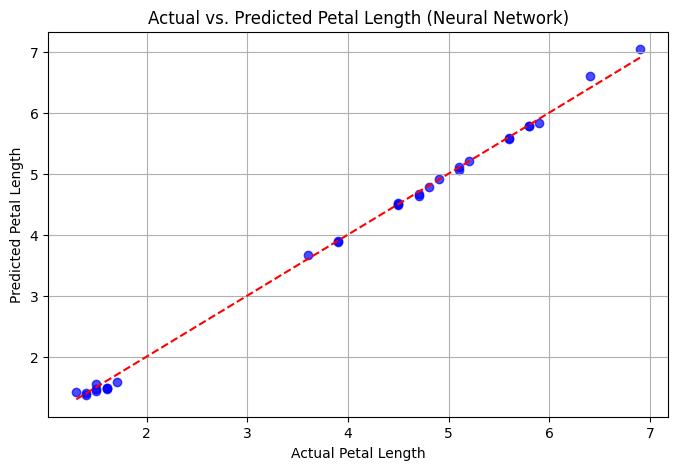

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# بارگیری داده‌های Iris از OpenML
iris = fetch_openml(name="iris", version=1, as_frame=True)
df = iris.frame

# نمایش ۱۰ سطر اول داده‌ها
print(df.head(10))  

# انتخاب ویژگی‌ها و متغیر هدف
X = df.drop(columns=['class'])  # حذف ویژگی غیرعددی
y = df['petallength']  # متغیر هدف

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ساخت مدل شبکه عصبی
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # خروجی یک نود دارد چون یک متغیر هدف داریم
])

# کامپایل مدل
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# آموزش مدل
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=0)

# پیش‌بینی
y_pred = model.predict(X_test_scaled).flatten()

# محاسبه معیارهای ارزیابی
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # خط y=x
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs. Predicted Petal Length (Neural Network)")
plt.grid()
plt.show()
